# <span style="color:red"><p style="text-align: center;"> Credit EDA Case Study</p></span>

## <span style="color:green">Problem Statement</span>


### <span style="color:green; text-align: center;">Business Understanding</span>
##### <p style="text-align: justify;">The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.</p>

##### <p style="text-align: justify;">When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- ##### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- ##### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</p>

##### <p style="text-align: justify;">The data given contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- ##### The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
- ##### All other cases: All other cases when the payment is paid on time.</p>

##### <p style="text-align: justify;">When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

- ##### <span style="background-color:DodgerBlue;color:white;">Approved:</span> The Company has approved loan Application
- ##### <span style="background-color:DodgerBlue;color:white;">Cancelled:</span>The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
- ##### <span style="background-color:DodgerBlue;color:white;">Refused:</span> The company had rejected the loan (because the client does not meet their requirements etc.).
- ##### <span style="background-color:DodgerBlue;color:white;">Unused offer:</span> Loan has been cancelled by the client but on different stages of the process.</p>

##### <p style="text-align: justify;">In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.</p>

### <span style="color:green; text-align: center;">Business Objectives</span>
##### <p style="text-align: justify;">This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
##### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.</p>

### <span style="color:green; text-align: center;">Data Understanding</span>
##### <p style="text-align: justify;">This dataset has 3 files as explained below:
##### 'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
##### 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
#### 'columns_description.csv' is data dictionary which describes the meaning of the variables.</p>

# <span style="color:LightYellow"><p style="text-align: center;background-color:Brown;"> EDA Case Study Solution</p></span>

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;"> IMPORT REQUIRED LIBRARIES</p></span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings

In [2]:
warnings.filterwarnings('ignore')

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Optimize rows and columns</p></span>

In [3]:
pd.set_option('display.max_columns', 200)  # Maximum column to display
pd.set_option('display.width', 1000) # Max width size
pd.set_option('display.max_rows', 1000) # Maximum rows to display
pd.set_option('display.expand_frame_repr', False) # Framr expansion

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Reading all the CSV into datasets</p></span>

In [4]:
df_app = pd.read_csv("application_data.csv")
pre_app = pd.read_csv("previous_application.csv")
col_desc = pd.read_csv("columns_description.csv")

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Understanding and clensing "application_data.csv"</p></span>

In [5]:
# Get number of rows and columns
df_app.shape

(307511, 122)

In [6]:
# Get datatypes of all the columns
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
df_app.info() # Details of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Display top rows of dataset
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
# Get the columns on which calculations can be performed
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Working with NULL Values</p></span>

In [10]:
# Get the column names having null values
null_val = df_app.isnull().sum()
null_val = null_val[null_val.values > 0]
print( "Total number of column with null values : " , len(null_val) )
null_val

Total number of column with null values :  67


AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [11]:
# Get the columns having null values more than 50%
null_per = (df_app.isna().sum())*100/df_app.shape[0]
null_per = null_per[null_per.values >= 50]
print("Total number of column with more than or equal to 50% null values : ", len(null_per))
null_per.sort_values(ascending = False)

Total number of column with more than or equal to 50% null values :  41


COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_MEDI          55.179164
NONLIVINGARE

In [12]:
# Delete all the columns having null values more than 50% as that cannot be used for data manupulation
df_app_new = df_app.drop(df_app.columns[df_app.apply(lambda col: (col.isna().sum())*100/df_app.shape[0] >= 50)], axis=1)
df_app_new.shape

(307511, 81)

In [13]:
# Display all columns and it type
df_app_new.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [14]:
# Get the remaining columns after deleting columns with more than 50% missing values
df_app_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Get the columns having null values more than 10%
null_per10 = (df_app_new.isna().sum())*100/df_app_new.shape[0]
null_per10 = null_per10[null_per10.values >= 10]
print("Number of column with null values more than or equal to 10% are :", len(null_per10))
null_per10.sort_values(ascending = False)

Number of column with null values more than or equal to 10% are : 16


FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
dtype: float64

In [16]:
# Read Description of the columns having null more than 10%
col_desc[col_desc.Row.isin (null_per10.index) ]

,Unnamed: 0,Table,Row,Description,Special
28,31,application_data,OCCUPATION_TYPE,What kind of occupation does the client have,NaN
43,46,application_data,EXT_SOURCE_3,Normalized score from external data source,normalized
46,49,application_data,YEARS_BEGINEXPLUATATION_AVG,Normalized information about building where th...,normalized
51,54,application_data,FLOORSMAX_AVG,Normalized information about building where th...,normalized
60,63,application_data,YEARS_BEGINEXPLUATATION_MODE,Normalized information about building where th...,normalized
65,68,application_data,FLOORSMAX_MODE,Normalized information about building where th...,normalized
74,77,application_data,YEARS_BEGINEXPLUATATION_MEDI,Normalized information about building where th...,normalized
79,82,application_data,FLOORSMAX_MEDI,Normalized information about building where th...,normalized
88,91,application_data,TOTALAREA_MODE,Normalized information about building where th...,normalized
90,93,application_data,EMERGENCYSTATE_MODE,Normalized information about building where th...,normalized


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we can see from the above data and after reading the description of the fields except 'OCCUPATION_TYPE and 'EXT_SOURCE_3', no other column is relavent. So we can delete all the other column except 'OCCUPATION_TYPE and 'EXT_SOURCE_3</p></span>

In [17]:
# Delete the columns which has null values more than 10% and are not required for decission making
null_per10.drop(['OCCUPATION_TYPE','EXT_SOURCE_3'],inplace = True)
null_per10

YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
dtype: float64

In [18]:
print("Number of column to be deleted as they are not relevent and having null values more than 10% :" , len(null_per10))

Number of column to be deleted as they are not relevent and having null values more than 10% : 14


In [19]:
# deleting unwanted column
df_app_new.drop(null_per10.index, inplace = True, axis = 1)
df_app_new.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [20]:
# Get the columns having null values more than 10%
null_per10 = (df_app_new.isna().sum())
null_per10 = null_per10[null_per10.values >= 10]
null_per10.sort_values(ascending = False)

OCCUPATION_TYPE             96391
EXT_SOURCE_3                60965
NAME_TYPE_SUITE              1292
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
EXT_SOURCE_2                  660
AMT_GOODS_PRICE               278
AMT_ANNUITY                    12
dtype: int64

In [21]:
dups = df_app_new.pivot_table(index = ['OCCUPATION_TYPE'], aggfunc ='size')
dups = dups.sort_values()
print(dups)

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we can se above that 'OCCUPATION_TYPE' as 96391 missing values. As it is a text column we cannot replace it with mean. Hence we will create new occupation type as 'UNKNOWN' and replace the same. Also we cannot replace it with any other profession as it is the largest value count of the column</p></span>

In [22]:
df_app_new.OCCUPATION_TYPE.fillna(value='Unknown', inplace = True)
dups = df_app_new.pivot_table(index = ['OCCUPATION_TYPE'], aggfunc ='size')
dups = dups.sort_values()
print(dups)

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
Unknown                  96391
dtype: int64


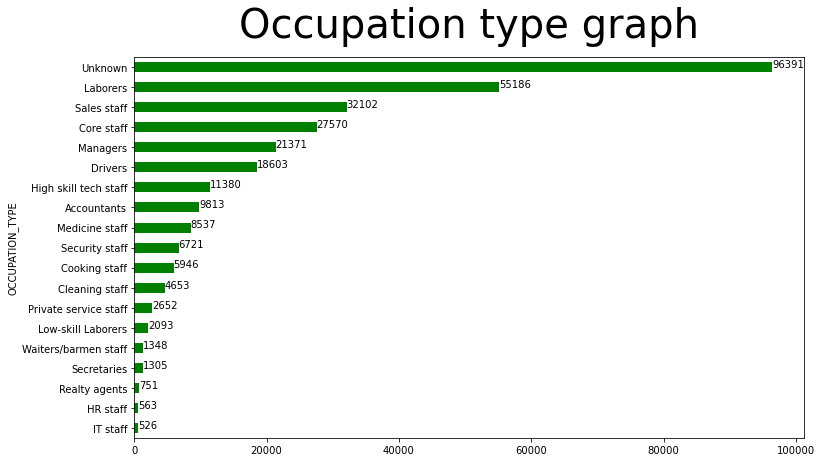

In [23]:
plt.figure(figsize = [12,7])
plt.title("Occupation type graph", fontdict={"fontsize":40}, pad=20)
dups.plot.barh(color="green",width =0.5)
for index, value in enumerate(dups):
    plt.text(value, index, str(value))
plt.show()

In [24]:
# Get the columns having null values more than 10%
null_per10 = (df_app_new.isna().sum())
null_per10 = null_per10[null_per10.values > 0]
null_per10.sort_values(ascending = False)

EXT_SOURCE_3                60965
NAME_TYPE_SUITE              1292
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
EXT_SOURCE_2                  660
AMT_GOODS_PRICE               278
AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
dtype: int64

In [25]:
# Read Description of the columns having null more than 10%
col_desc[col_desc.Row.isin (null_per10.index) ]

,Unnamed: 0,Table,Row,Description,Special
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN
10,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN
11,14,application_data,NAME_TYPE_SUITE,Who was accompanying client when he was applyi...,NaN
29,32,application_data,CNT_FAM_MEMBERS,How many family members does client have,NaN
42,45,application_data,EXT_SOURCE_2,Normalized score from external data source,normalized
43,46,application_data,EXT_SOURCE_3,Normalized score from external data source,normalized
91,94,application_data,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
92,95,application_data,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
93,96,application_data,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
94,97,application_data,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we can see above that only relavent columns with missing values are 'AMT_ANNUITY','AMT_GOODS_PRICE',EXT_SOURCE_2 and EXT_SOURCE_3 are usefull . So let us delete the other columns</p></span>

In [26]:
null_per10.drop(['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3'],inplace = True)

In [27]:
print('Number of unwanted columns to be deleted are : ', len(null_per10))

Number of unwanted columns to be deleted are :  7


In [28]:
df_app_new.drop(null_per10.index, inplace = True, axis = 1)

In [29]:
df_app_new.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [30]:
null_per = (df_app_new.isna().sum())
null_per = null_per[null_per.values > 0]
null_per.sort_values(ascending = False)

EXT_SOURCE_3       60965
EXT_SOURCE_2         660
AMT_GOODS_PRICE      278
AMT_ANNUITY           12
dtype: int64


## Handling EXT_SOURCE_2 and EXT_SOURCE_3

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we know both the columns are normalised column values, we have to first understand the relation between these two with the help of heat map</p></span>

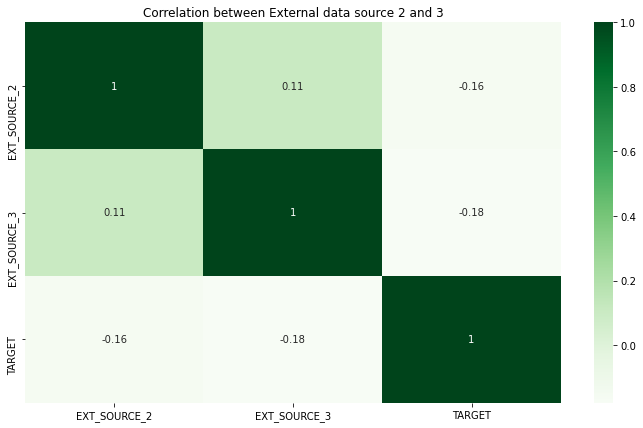

In [31]:
plt.figure(figsize = [12,7])
sns.heatmap(df_app_new[['EXT_SOURCE_2']+['EXT_SOURCE_3']+['TARGET']].corr(), cmap='Greens', annot=True)
plt.title("Correlation between External data source 2 and 3")
plt.show()

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we can see that there is no correlation. Hence we can delete these two columns as well</p></span>

In [32]:
df_app_new.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], inplace = True, axis = 1)
df_app_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [33]:
null_per = (df_app_new.isna().sum())
null_per = null_per[null_per.values > 0]
null_per.sort_values(ascending = False)

AMT_GOODS_PRICE    278
AMT_ANNUITY         12
dtype: int64

In [34]:
grp_cnt = df_app_new['AMT_GOODS_PRICE'].value_counts().sort_values
print(grp_cnt)

<bound method Series.sort_values of 450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64>


In [35]:
grp_cnt = df_app_new['AMT_ANNUITY'].value_counts().sort_values
print(grp_cnt)

<bound method Series.sort_values of 9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64>


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> As we can see above that both the columns AMT_ANNUITY and AMT_GOODS_PRICE have outliers, it is good idea to replace the missing value with median</p></span>

In [36]:
med_val = df_app_new['AMT_ANNUITY'].median()
df_app_new.loc[df_app_new['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= med_val

med_val = df_app_new['AMT_GOODS_PRICE'].median()
df_app_new.loc[df_app_new['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= med_val

In [37]:
null_per = (df_app_new.isna().sum())
null_per = null_per[null_per.values > 0]
null_per.sort_values(ascending = False)

Series([], dtype: int64)

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> Now we don't have any column with empty cells</p></span>

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Working with 'XNA' values</p></span>

In [38]:
# Getting rows having XNA values
xna_val = df_app_new.where(df_app_new == 'XNA').count()
xna_val = xna_val[xna_val.values > 0]
xna_val.sort_values(ascending = False)

ORGANIZATION_TYPE    55374
CODE_GENDER              4
dtype: int64

In [39]:
grp_cnt = df_app_new['CODE_GENDER'].value_counts().sort_values
grp_cnt

<bound method Series.sort_values of F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64>

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> As we can see for that for CODE_GENDER we have double the female than male. So the 4 XNA values can be added to male, as it will not make much difference even when we compare , total male and female if required</p></span>

In [40]:
df_app_new['CODE_GENDER'] = df_app_new['CODE_GENDER'].replace(['XNA'],'M')

In [41]:
grp_cnt = df_app_new['ORGANIZATION_TYPE'].value_counts().sort_values
grp_cnt

<bound method Series.sort_values of Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Indu

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> As we can see that for ORGANIZATION_TYPE we cannot put it under any of the existing organization type, because it is the largest value in the group. Hence we will create a new organization type as Unknown and replace the same</p></span>

In [42]:
df_app_new['ORGANIZATION_TYPE'] = df_app_new['ORGANIZATION_TYPE'].replace(['XNA'],'Unknown')

In [43]:
# Getting rows having XNA values
xna_val = df_app_new.where(df_app_new == 'XNA').count()
xna_val = xna_val[xna_val.values > 0]
xna_val.sort_values(ascending = False)

Series([], dtype: int64)

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> We can see that there are no XNA values</p></span>

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Working with Flagged Columns</p></span>

In [44]:
# Get all Flagged column along with Target
flag_cl = df_app_new[["TARGET"] + [x for x in df_app_new.columns if "FLAG" in x]]
flag_cl

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,N,N,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,N,Y,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,N,Y,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,1,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
col_desc[col_desc.Row.isin (flag_cl.columns) ]

,Unnamed: 0,Table,Row,Description,Special
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
22,25,application_data,FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)",NaN
23,26,application_data,FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)",NaN
24,27,application_data,FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",NaN
25,28,application_data,FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)",NaN
26,29,application_data,FLAG_PHONE,"Did client provide home phone (1=YES, 0=NO)",NaN
27,30,application_data,FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)",NaN
96,99,application_data,FLAG_DOCUMENT_2,Did client provide document 2,NaN


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> As per the column description above </p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">-  For TARGET column 1 = Defaulter and 0 = Repayer</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">-  For FLAG columns 1 = 'YES' and 0 = 'NO' </p></span>

In [46]:
# Replace TARGET column values as per the column description
flag_cl['TARGET'] = flag_cl['TARGET'].replace({0:'REPAYER', 1:'DEFAULTER'})
# Replace FLAG column vlaues as per the description
for i in flag_cl:
    if i != 'TARGET':
        flag_cl[i] = flag_cl[i].replace({0:'NO', 1:'YES'})
        flag_cl[i] = flag_cl[i].replace({'N':'NO', 'Y':'YES'})
    

In [47]:
flag_cl.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,DEFAULTER,NO,YES,YES,YES,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,REPAYER,NO,NO,YES,YES,NO,YES,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
2,REPAYER,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,REPAYER,NO,YES,YES,YES,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,REPAYER,NO,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;"> Plot graph for all the FLAG column to understand the relation before dropping the columns</p></span>

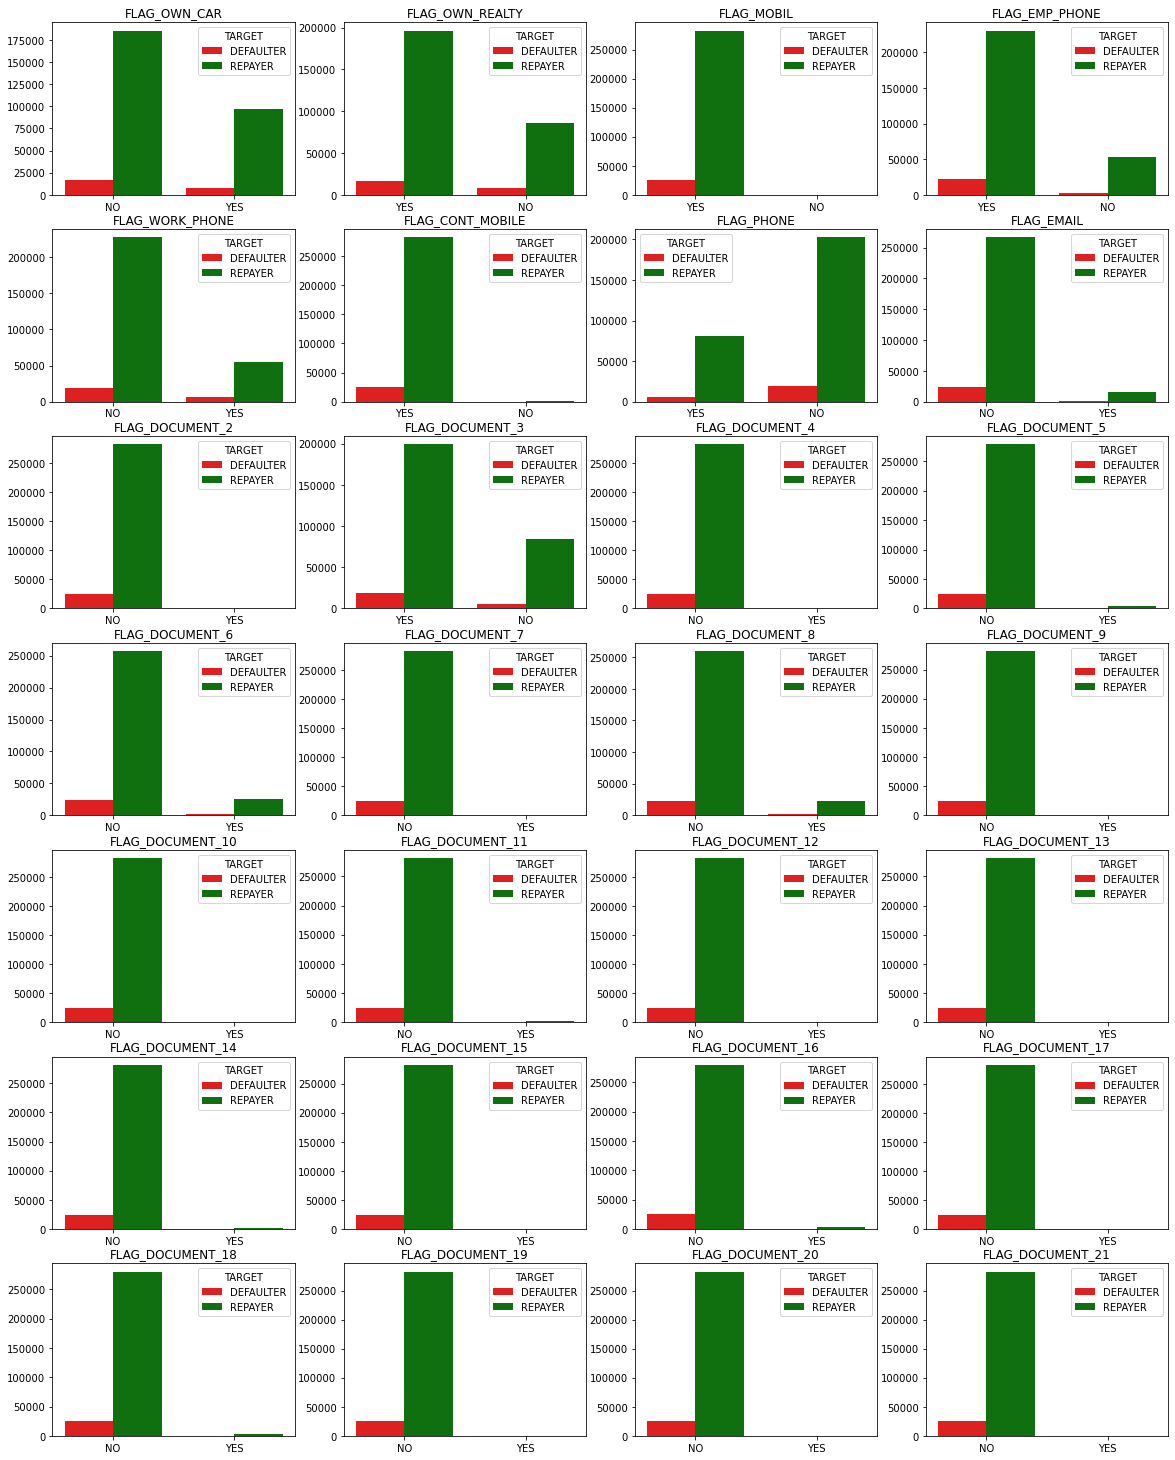

In [48]:
plt.figure(figsize = [20,26])
for i,j in it.zip_longest(flag_cl.columns, range(len(flag_cl.columns))):
    if i != 'TARGET':
        plt.subplot(7,4,j)
        ax = sns.countplot(flag_cl[i], hue = flag_cl['TARGET'],palette = ['r','g'])
        plt.title(i)
        plt.xlabel('')
        plt.ylabel('')


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">With the above subplot we can say that column 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE', and 'FLAG_DOCUMENT_3' have more repayer. So we will keep these columns and remove other columns</p></span>

In [49]:
flag_cl.drop(['TARGET','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_DOCUMENT_3'], inplace = True, axis = 1)

In [50]:
print('Total columns removed after analyzing flag colums are :' , len(flag_cl.columns))

Total columns removed after analyzing flag colums are : 23


In [51]:
df_app_new.drop(flag_cl.columns, inplace = True, axis = 1)

In [52]:
df_app_new.shape

(307511, 35)

In [53]:
df_app_new.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [54]:
# Display column Descripiton
col_desc[col_desc.Row.isin (df_app_new.columns) ]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN
10,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN


In [55]:
print(df_app_new.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_CONT_MOBILE               0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">After getting data ready we can say that</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:DarkGreen;">   1. out of 122 rows only 35 rows are good for analization</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:Brown;">   2. There are more number of females who applied for loan than male</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:DarkRed;">3. People who provided all the document are most of the time repayers than who did not provide all the document</p></span>

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Checking Clensed Values</p></span>

In [56]:
df_app_new.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.998133,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.710023
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.043164,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.453752
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,1.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,1.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,1.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_app_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,1,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,1,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,1
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,1,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,1,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0


#### <span style="color:LightYellow"><p style="text-align: justify;background-color:Black;">As we can see above</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:DarkGreen;">1. We have to convert columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE into categorical column an understand it better as they have very high values.</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:Brown;">2. columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, have negative values, which cannot be true. So we have to correct it</p></span><span style="color:LightYellow"><p style="text-align: justify;background-color:DarkRed;">3. convert Days to years for DAYS_BIRTH and DAYS_EMPLOYED</p></span>

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Creating Categorical Column</p></span>

In [58]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

In [59]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_app_new[numeric_columns]=df_app_new[numeric_columns].apply(pd.to_numeric)
df_app_new.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,1,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,1,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,1
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,1,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,1,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0


In [60]:
# Create Bins of Lakh each for columns to create categorical column
# Total Income
df_app_new['AMT_INCOME_TOTAL']=df_app_new['AMT_INCOME_TOTAL']/100000

data_bin = [0,1,2,3,4,5,6,7,8,9,10,11]
ranges = ['0L-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df_app_new['BIN_INCOME_RANGE']=pd.cut(df_app_new['AMT_INCOME_TOTAL'],data_bin,labels=ranges)

In [61]:
round((df_app_new["BIN_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.73
2L-3L        21.21
0L-1L        20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: BIN_INCOME_RANGE, dtype: float64

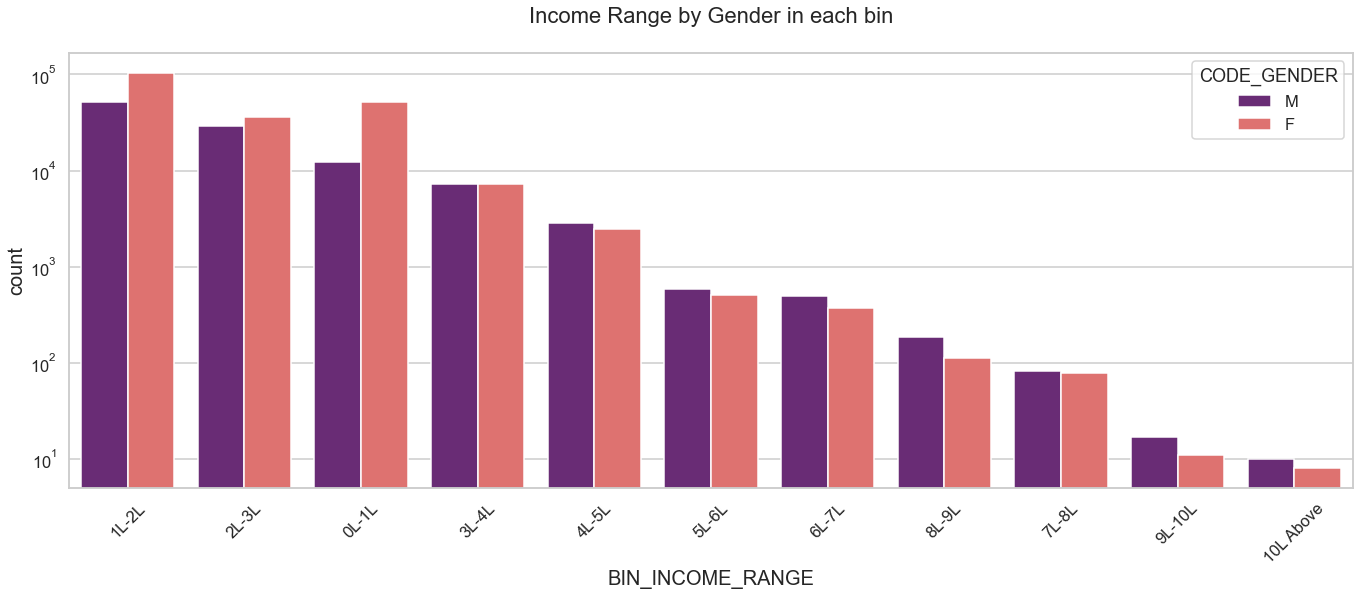

In [62]:
uniplot(df_app_new,col='BIN_INCOME_RANGE',title='Income Range by Gender in each bin',hue='CODE_GENDER')

From the above graph we can see that
1. Women are getting more Income than men
2. People with income range form 1L to 2L are highest.
3. On an average we can observe that femail earns more than male
5. 5 Lakh and above there are very less people and almost and and female are equal

In [63]:
data_bin = [0,1,2,3,4,5,6,7,8,9,10,100]

# Credit Amount
df_app_new['AMT_CREDIT']=df_app_new['AMT_CREDIT']/100000
df_app_new['BIN_CREDIT_RANGE']=pd.cut(df_app_new['AMT_CREDIT'],data_bin,labels=ranges)

In [64]:
round((df_app_new["BIN_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0L-1L         1.95
Name: BIN_CREDIT_RANGE, dtype: float64

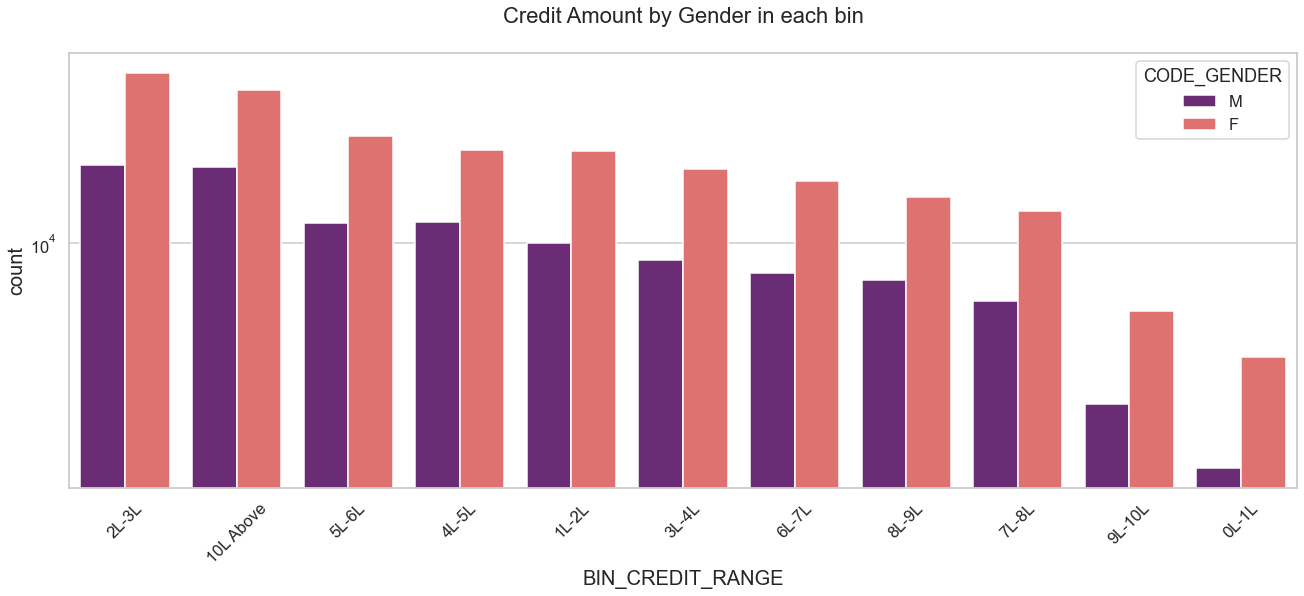

In [65]:
uniplot(df_app_new,col='BIN_CREDIT_RANGE',title='Credit Amount by Gender in each bin',hue='CODE_GENDER')

From above graph we can see that
1. Women has more credit than men in all the ranges
2. The highest create amount requested is between 2L-3L

In [66]:
# Goods Price Amount
df_app_new['AMT_GOODS_PRICE']=df_app_new['AMT_GOODS_PRICE']/100000
df_app_new['BIN_GOODS_PRICE_RANGE']=pd.cut(df_app_new['AMT_GOODS_PRICE'],data_bin,labels=ranges)

In [67]:
round((df_app_new["BIN_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.41
4L-5L        18.62
6L-7L        13.02
10L Above    11.10
1L-2L        10.72
8L-9L         6.99
3L-4L         6.90
5L-6L         4.27
0L-1L         2.83
7L-8L         2.64
9L-10L        2.52
Name: BIN_GOODS_PRICE_RANGE, dtype: float64

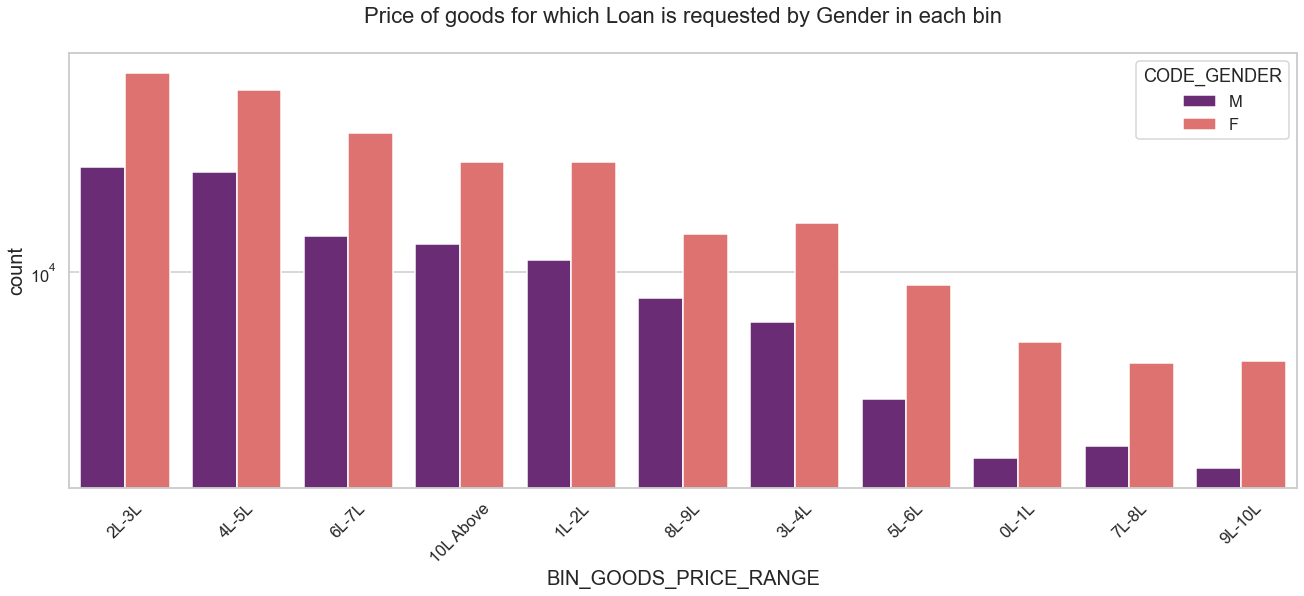

In [68]:
uniplot(df_app_new,col='BIN_GOODS_PRICE_RANGE',title='Price of goods for which Loan is requested by Gender in each bin',hue='CODE_GENDER')

From the above we can see that
1. Women asked for more goods loan than men
2. In all the category women is on top

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Other group by Gender</p></span>

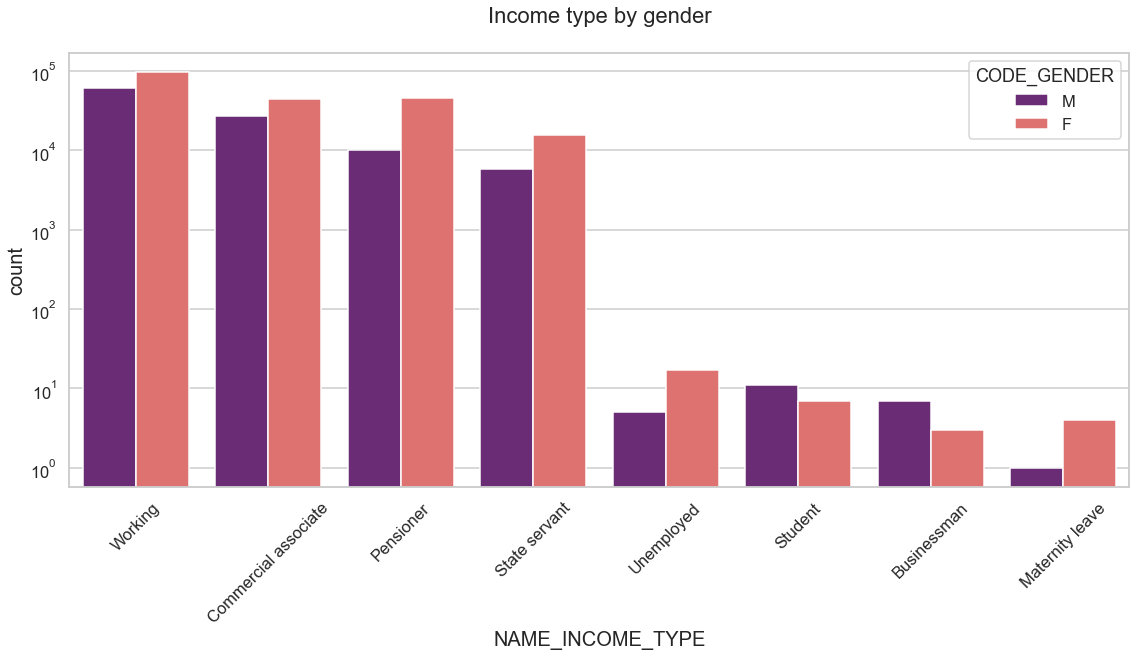

In [69]:
uniplot(df_app_new,col='NAME_INCOME_TYPE',title='Income type by gender',hue='CODE_GENDER')

As we can see above
1. Working Professional and Commercial associate lead the ladder
2. Females lead even in this catogory
3. Person on Meternity leave or Businessman are less

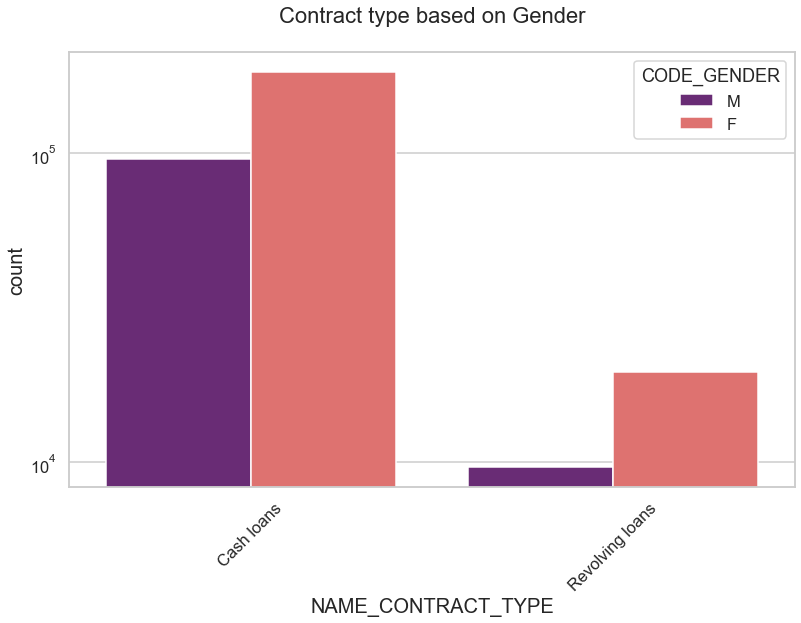

In [70]:
uniplot(df_app_new,col='NAME_CONTRACT_TYPE',title='Contract type based on Gender',hue='CODE_GENDER')

As we can see above
1. Cash loans are move than revolving loans
2. Even in this category women are more than men

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Converting Negative Days</p></span>

In [71]:
abs_days = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]

df_app_new[abs_days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [72]:
# using absolute function we can convert negative number to positive
df_app_new[abs_days]= abs(df_app_new[abs_days])
df_app_new[abs_days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373
std,4363.988632,139443.751806,3522.886321,1509.450419
min,7489.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Convert Days to Years</p></span>

In [73]:
df_app_new["AGE"] = df_app_new["DAYS_BIRTH"]/365
df_app_new["YEARS_EMPLOYED"] = df_app_new["DAYS_EMPLOYED"]/365

In [74]:
# Create BIN even for AGE to understand the data better

In [75]:
age_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,100]
age_slot = ["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70","70 Above"]

df_app_new["AGE_GROUP"] = pd.cut(df_app_new["AGE"], bins=age_bins, labels=age_slot)

In [76]:
df_app_new["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
60-65        8.934965
20-25        3.954005
65-70        2.635028
0-5          0.000000
5-10         0.000000
10-15        0.000000
15-20        0.000000
70 Above     0.000000
Name: AGE_GROUP, dtype: float64

In [77]:
# Creating bin for years employed
emp_bins = [0,5,10,15,20,25,30,35,40]
emp_slot = ["0-5","5-10","10-15","15-20","20-25","25-30","30-35","40 Above"]

df_app_new["EMPLOYED_GROUP"] = pd.cut(df_app_new["YEARS_EMPLOYED"], bins=emp_bins, labels=emp_slot)

In [78]:
df_app_new["EMPLOYED_GROUP"].value_counts(normalize= True)*100

0-5         54.112131
5-10        25.752974
10-15       10.936439
15-20        4.306851
20-25        2.478355
25-30        1.313214
30-35        0.769747
40 Above     0.330288
Name: EMPLOYED_GROUP, dtype: float64

## <span style="color:LightYellow"><p style="text-align: center;background-color:DarkGreen;">Finding Outliers</p></span>

In [79]:
df_app_new.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.487841,5.383163,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.998133,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.710023,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.461065,3.692890,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.043164,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.453752,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,1.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,1.000000,1.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,1.000000,1.000000,1.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,1.000000,1.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.120548,1000.665753


From the data above we can easily find the outliers when we see the max value and the percentlie(25,50 and 75). Also for some columns like AMT_CREDIT or DAYS_EMPLOYED it makes no sense to have such a high max value. let us take all that column and analyse

In [80]:
outliers = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

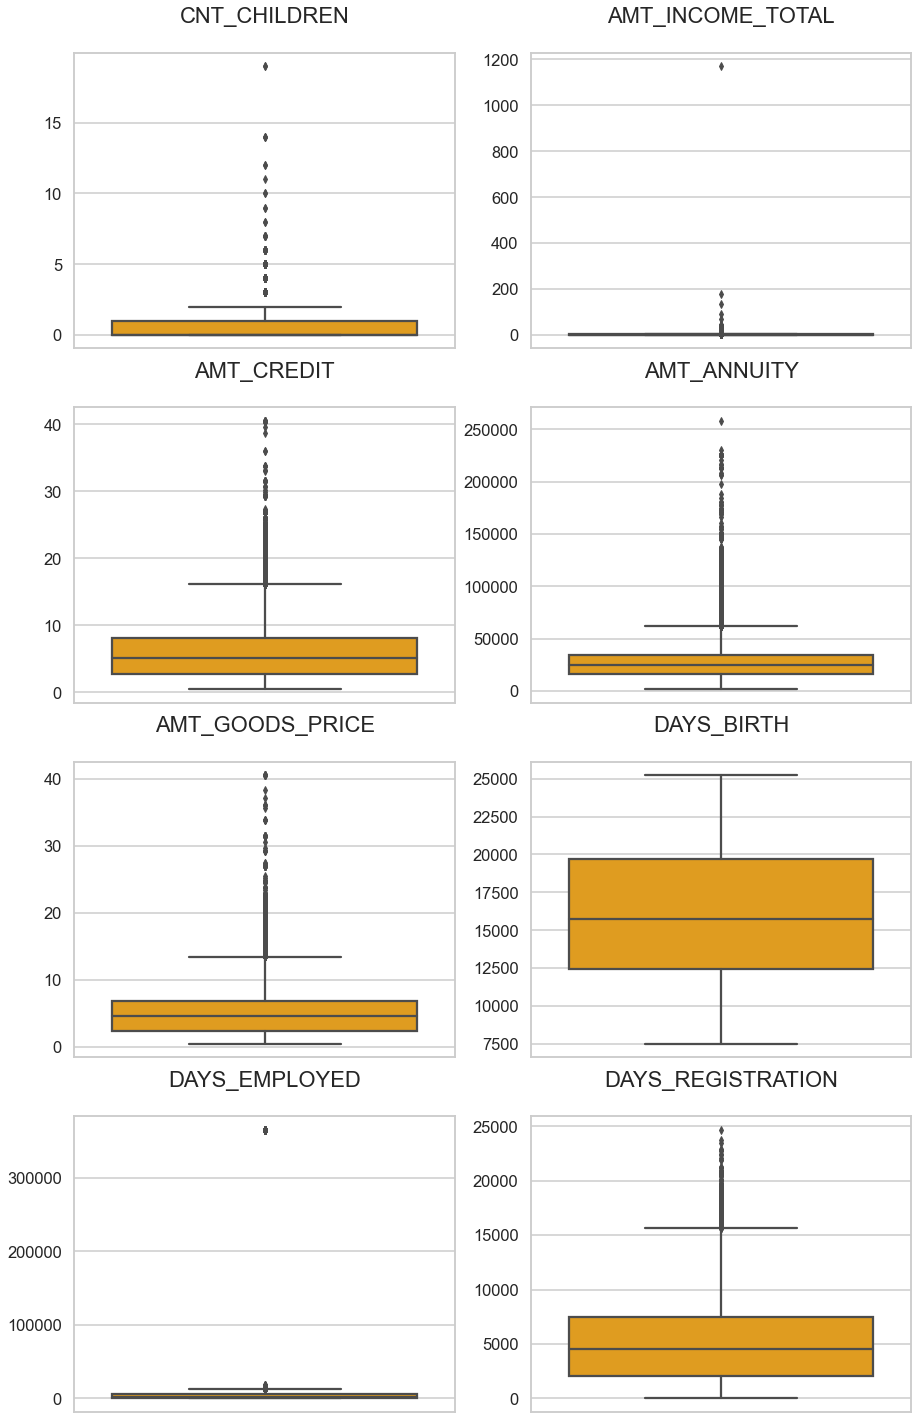

In [81]:
plt.figure(figsize=[15,25])
for i,j in it.zip_longest(outliers, range(len(outliers))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = df_app_new[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### We can clearly see taht

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have outliers.

AMT_INCOME_TOTAL has huge number of outliers , by which we can say that few loan appliation has high income than others.

DAYS_BIRTH has no outliers which means the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years. Which clearly indicate that is wrong entry

# Understanding the data set

In [82]:
# Dividing the dataset into payment defaulters and others
df_defaulter = df_app_new.loc[df_app_new["TARGET"]==0]
df_no_defaulter = df_app_new.loc[df_app_new["TARGET"]==1]

In [83]:
df_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   282686 non-null  int64   
 1   TARGET                       282686 non-null  int64   
 2   NAME_CONTRACT_TYPE           282686 non-null  object  
 3   CODE_GENDER                  282686 non-null  object  
 4   FLAG_OWN_REALTY              282686 non-null  object  
 5   CNT_CHILDREN                 282686 non-null  int64   
 6   AMT_INCOME_TOTAL             282686 non-null  float64 
 7   AMT_CREDIT                   282686 non-null  float64 
 8   AMT_ANNUITY                  282686 non-null  float64 
 9   AMT_GOODS_PRICE              282686 non-null  float64 
 10  NAME_INCOME_TYPE             282686 non-null  object  
 11  NAME_EDUCATION_TYPE          282686 non-null  object  
 12  NAME_FAMILY_STATUS           282686 non-null

In [84]:
df_no_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  int64   
 2   NAME_CONTRACT_TYPE           24825 non-null  object  
 3   CODE_GENDER                  24825 non-null  object  
 4   FLAG_OWN_REALTY              24825 non-null  object  
 5   CNT_CHILDREN                 24825 non-null  int64   
 6   AMT_INCOME_TOTAL             24825 non-null  float64 
 7   AMT_CREDIT                   24825 non-null  float64 
 8   AMT_ANNUITY                  24825 non-null  float64 
 9   AMT_GOODS_PRICE              24825 non-null  float64 
 10  NAME_INCOME_TYPE             24825 non-null  object  
 11  NAME_EDUCATION_TYPE          24825 non-null  object  
 12  NAME_FAMILY_STATUS           24825 non-null  object  
 13  

### We can clearly see that Defaulters are more that non-defaulter

In [85]:
# Calculate imbalance ratio
round(len(df_defaulter)/len(df_no_defaulter),2)

11.39

### We can see that imbalance ratio is 11.39

In [86]:
# Finding colrelation between Defaulter and non defaulters
df_defaluter_corr=df_defaulter.iloc[0:,2:]
df_no_defaulter_corr=df_no_defaulter.iloc[0:,2:]

df_defaulter=df_defaluter_corr.corr(method='spearman')
df_no_defaulter=df_no_defaulter_corr.corr(method='spearman')

In [87]:
df_defaulter

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001320,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,0.001205,0.271736,-0.001897,0.019537,0.017697,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585,0.059136,-0.375639,-0.205693
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.419720,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,0.000944,0.200203,-0.009861,-0.209520,-0.229681,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321,-0.007432,-0.093515,-0.095898
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.984995,0.053570,0.057151,0.017986,-0.009416,0.001982,0.001521,0.075798,0.028357,-0.087614,-0.097047,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972,0.131550,0.057151,0.017986
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.829802,0.058591,-0.011740,-0.030195,-0.037717,-0.016570,-0.000193,0.118424,0.027209,-0.116838,-0.130757,0.054189,0.035819,0.075773,0.073042,-0.004962,0.009718,0.019451,0.150731,-0.011740,-0.030195
AMT_GOODS_PRICE,-0.001320,0.419720,0.984995,0.829802,1.000000,0.062625,0.058342,0.022717,-0.009501,0.004042,0.001443,0.073596,0.025373,-0.089750,-0.098691,0.058858,0.020404,0.046368,0.048044,-0.028154,-0.015466,0.004666,0.106289,0.058342,0.022717
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062625,1.000000,0.030730,-0.003651,0.036684,0.010463,0.001282,0.004654,-0.007009,-0.426028,-0.433167,0.128237,-0.019922,0.029206,0.051195,-0.045545,-0.029350,-0.005476,-0.061390,0.030730,-0.003651
DAYS_BIRTH,-0.375639,-0.093515,0.057151,-0.011740,0.058342,0.030730,1.000000,0.583711,0.298130,0.261979,0.003132,-0.605667,0.015413,-0.003174,-0.001625,-0.098444,-0.066377,-0.096421,-0.070065,-0.180952,-0.239113,-0.156588,-0.100937,1.000000,0.583711
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022717,-0.003651,0.583711,1.000000,0.201306,0.259900,0.002818,-0.675084,0.013904,0.037011,0.037250,-0.084417,-0.071272,-0.137882,-0.112790,-0.145590,-0.262852,-0.198795,-0.132584,0.583711,1.000000
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,-0.009501,0.036684,0.298130,0.201306,1.000000,0.094153,-0.000185,-0.176652,0.004619,-0.073304,-0.066669,0.008471,-0.025938,-0.032723,-0.024163,-0.055307,-0.085865,-0.062442,-0.023214,0.298130,0.201306
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016570,0.004042,0.010463,0.261979,0.259900,0.094153,1.000000,0.002282,-0.279558,0.002114,0.010029,0.013014,-0.039755,-0.035392,-0.049195,-0.034776,-0.077360,-0.101050,-0.062976,-0.051835,0.261979,0.259900


In [88]:
df_no_defaulter

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007564,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,NaN,0.216518,0.002769,0.041631,0.043367,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352,0.070052,-0.267862,-0.127943
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362476,0.051463,0.007238,-0.036127,-0.036671,0.005929,NaN,0.136230,0.000330,-0.157085,-0.174307,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864,0.007852,0.007238,-0.036127
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.976430,0.039919,0.155216,0.082434,0.017099,0.053780,NaN,0.000857,0.039054,-0.047654,-0.059218,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182,0.101969,0.155216,0.082434
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804099,0.023297,0.030483,-0.003396,-0.035900,0.014472,NaN,0.088468,0.038179,-0.057905,-0.072974,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922,0.131613,0.030483,-0.003396
AMT_GOODS_PRICE,-0.007564,0.362476,0.976430,0.804099,1.000000,0.054091,0.157714,0.092653,0.019180,0.059710,NaN,-0.005903,0.036195,-0.056469,-0.067315,0.040018,0.016967,0.033713,0.034974,-0.030196,-0.032537,-0.012539,0.074851,0.157714,0.092653
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054091,1.000000,0.046398,0.020003,0.034315,0.023668,NaN,-0.014634,-0.002453,-0.333042,-0.347461,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447,-0.029659,0.046398,0.020003
DAYS_BIRTH,-0.267862,0.007238,0.155216,0.030483,0.157714,0.046398,1.000000,0.466526,0.232940,0.251626,NaN,-0.508230,0.011950,-0.035383,-0.035618,-0.065810,-0.055835,-0.064540,-0.039911,-0.165372,-0.203415,-0.108966,-0.104315,1.000000,0.466526
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092653,0.020003,0.466526,1.000000,0.148988,0.209881,NaN,-0.564290,0.012250,0.003899,0.004047,-0.043106,-0.075600,-0.118454,-0.090170,-0.144260,-0.249624,-0.167530,-0.119981,0.466526,1.000000
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.019180,0.034315,0.232940,0.148988,1.000000,0.095750,NaN,-0.147796,-0.003871,-0.096914,-0.093518,0.032019,-0.015237,-0.014323,-0.010359,-0.033891,-0.071324,-0.052747,-0.028619,0.232940,0.148988
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.059710,0.023668,0.251626,0.209881,0.095750,1.000000,NaN,-0.230251,-0.006811,-0.002648,0.000248,-0.026347,-0.032654,-0.032845,-0.019967,-0.068605,-0.070867,-0.031407,-0.028861,0.251626,0.209881


In [89]:
# Corelation map
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

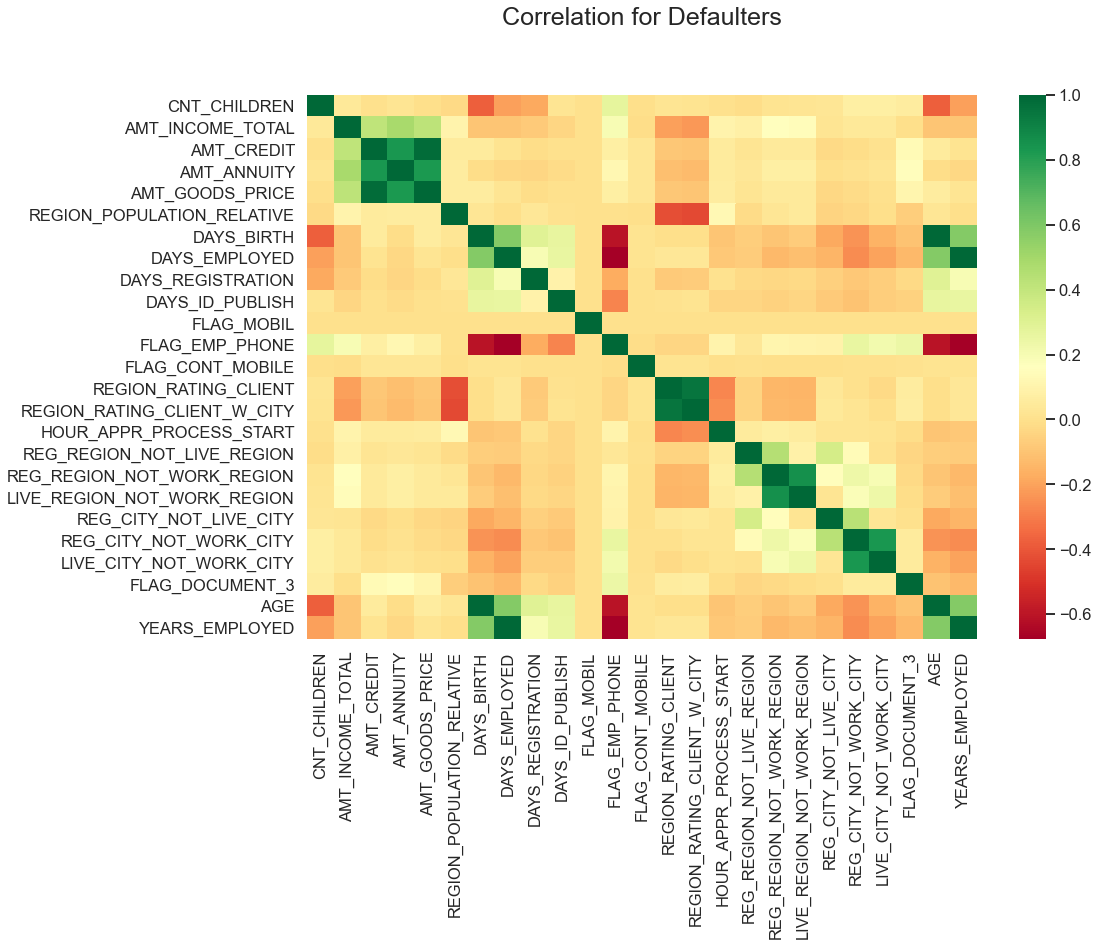

In [90]:
# For Defaulters
targets_corr(data=df_defaulter,title='Correlation for Defaulters')

#### As we can see above

1. Credit amount is inversely proportional to the date of birth

2. Credit amount is inversely proportional to the number of children client have

3. Income amount is inversely proportional to the number of children client have

4. less children client have in densely populated area.

5. Credit amount is higher to densely populated area.

6. The income is also higher in densely populated area.

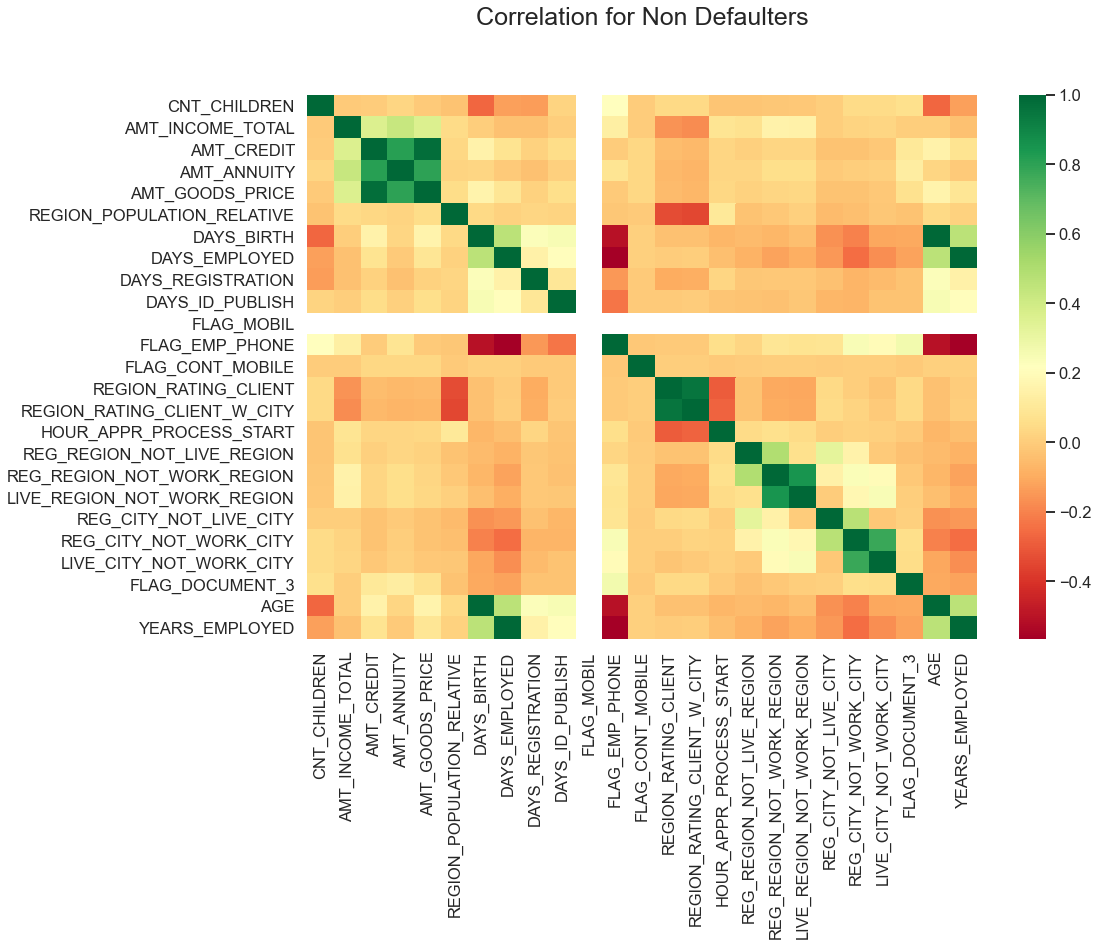

In [91]:

# For Non Defaulters

targets_corr(data=df_no_defaulter,title='Correlation for Non Defaulters')

As we can see above

1. The client's permanent address does not match contact address are having less children
2. The client's permanent address does not match work address are having less children

### Analyse prvious data set (PRE_APP)

#### Cleasing Data before analysing

In [92]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
pre_app.info("All")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### AS we can see that there are 37 column and 1670214 rows

In [94]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### AS we can see that days columns have negative values which should be fixed

In [95]:
emptycol1=pre_app.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

### As we can see that there are 15 columns which have null values more than 30%. Let us delete all the columns. Along with this let us delete column having XNA and XAP values

In [96]:
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
pre_app.drop(labels=emptycol1,axis=1,inplace=True)

pre_app.shape

(1670214, 22)

In [97]:
# Getting rows having XNA values
xna_val = pre_app.where(pre_app == 'XNA').count()
xna_val = xna_val[xna_val.values > 0]
xna_val.sort_values(ascending = False)

NAME_PRODUCT_TYPE         1063666
NAME_GOODS_CATEGORY        950809
NAME_SELLER_INDUSTRY       855720
NAME_CASH_LOAN_PURPOSE     677918
NAME_PAYMENT_TYPE          627384
NAME_YIELD_GROUP           517215
NAME_PORTFOLIO             372230
CODE_REJECT_REASON           5244
NAME_CLIENT_TYPE             1941
NAME_CONTRACT_TYPE            346
dtype: int64

In [98]:
pre_app=pre_app.drop(pre_app[pre_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_app=pre_app.drop(pre_app[pre_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
pre_app.shape

(69635, 22)

## Merge both the dataset

In [99]:
new_df=pd.merge(left=df_app_new,right=pre_app,how='inner',on='SK_ID_CURR',suffixes='_p')

In [100]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [101]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### Performing univariate analysis

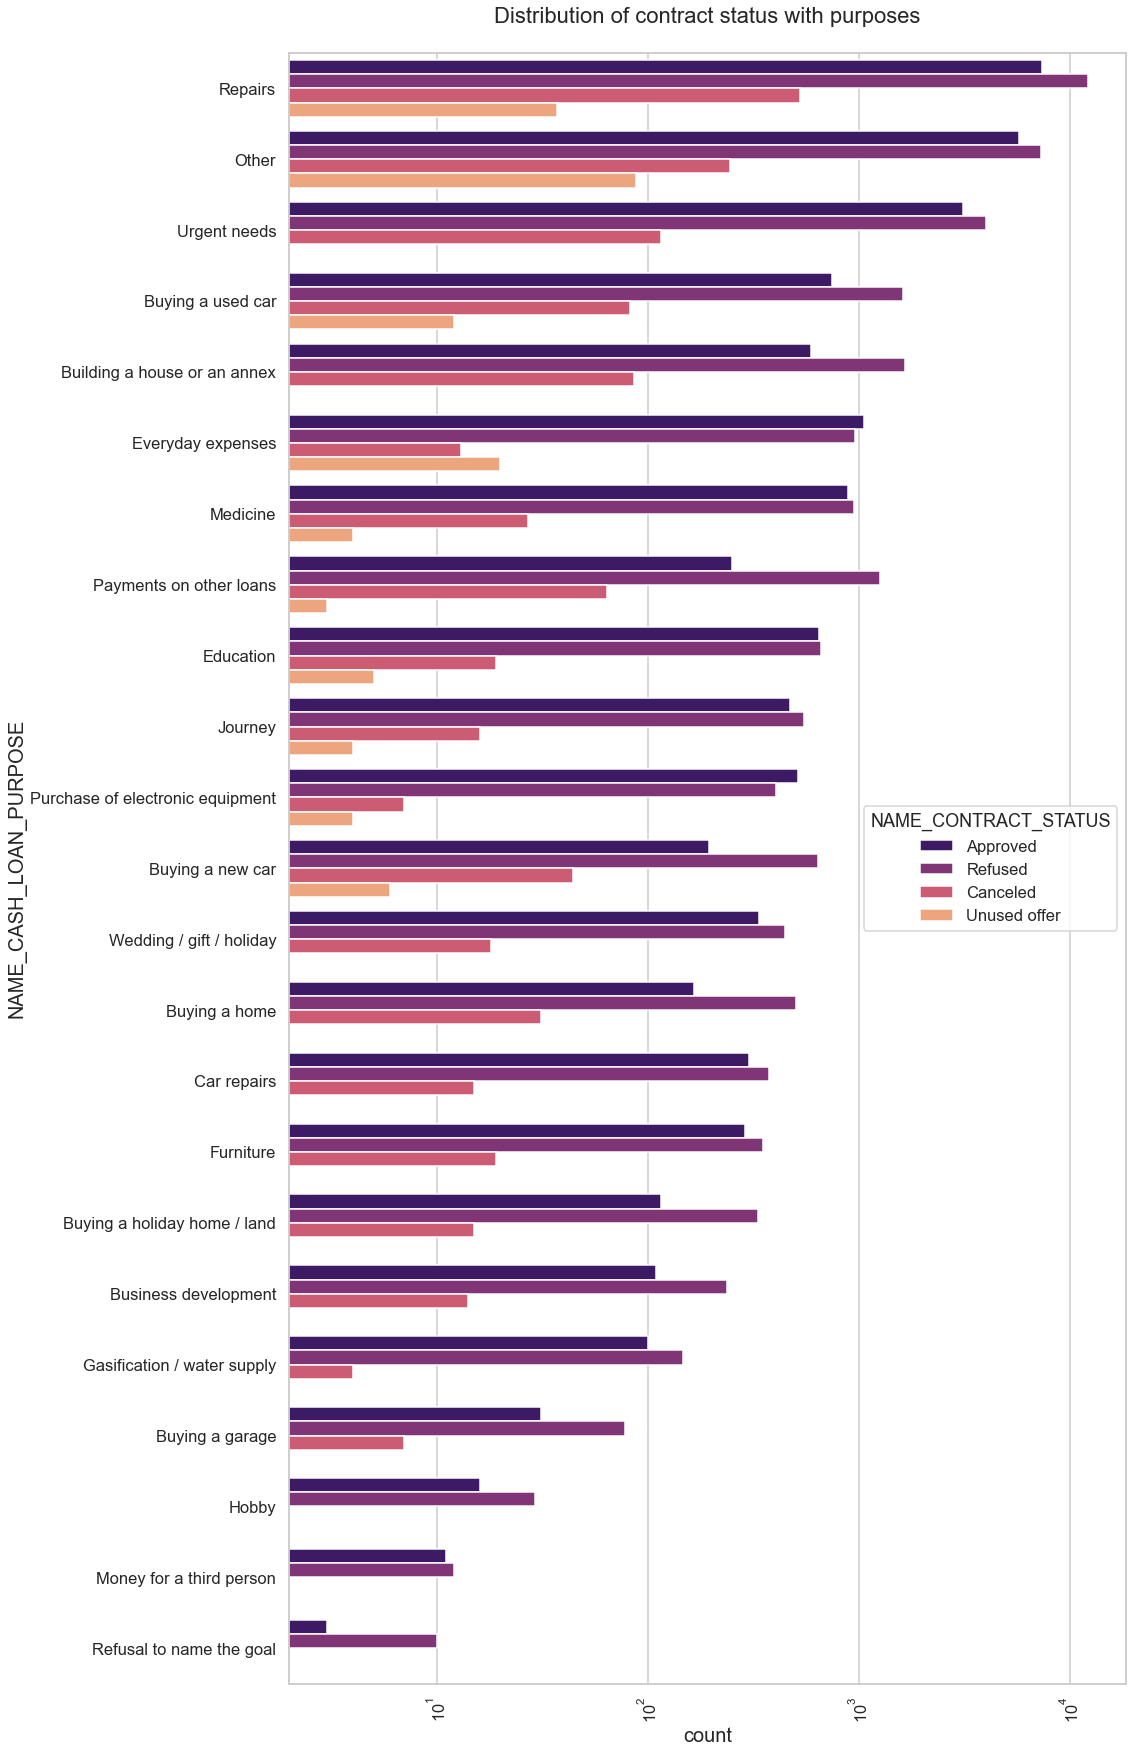

In [102]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

#### Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

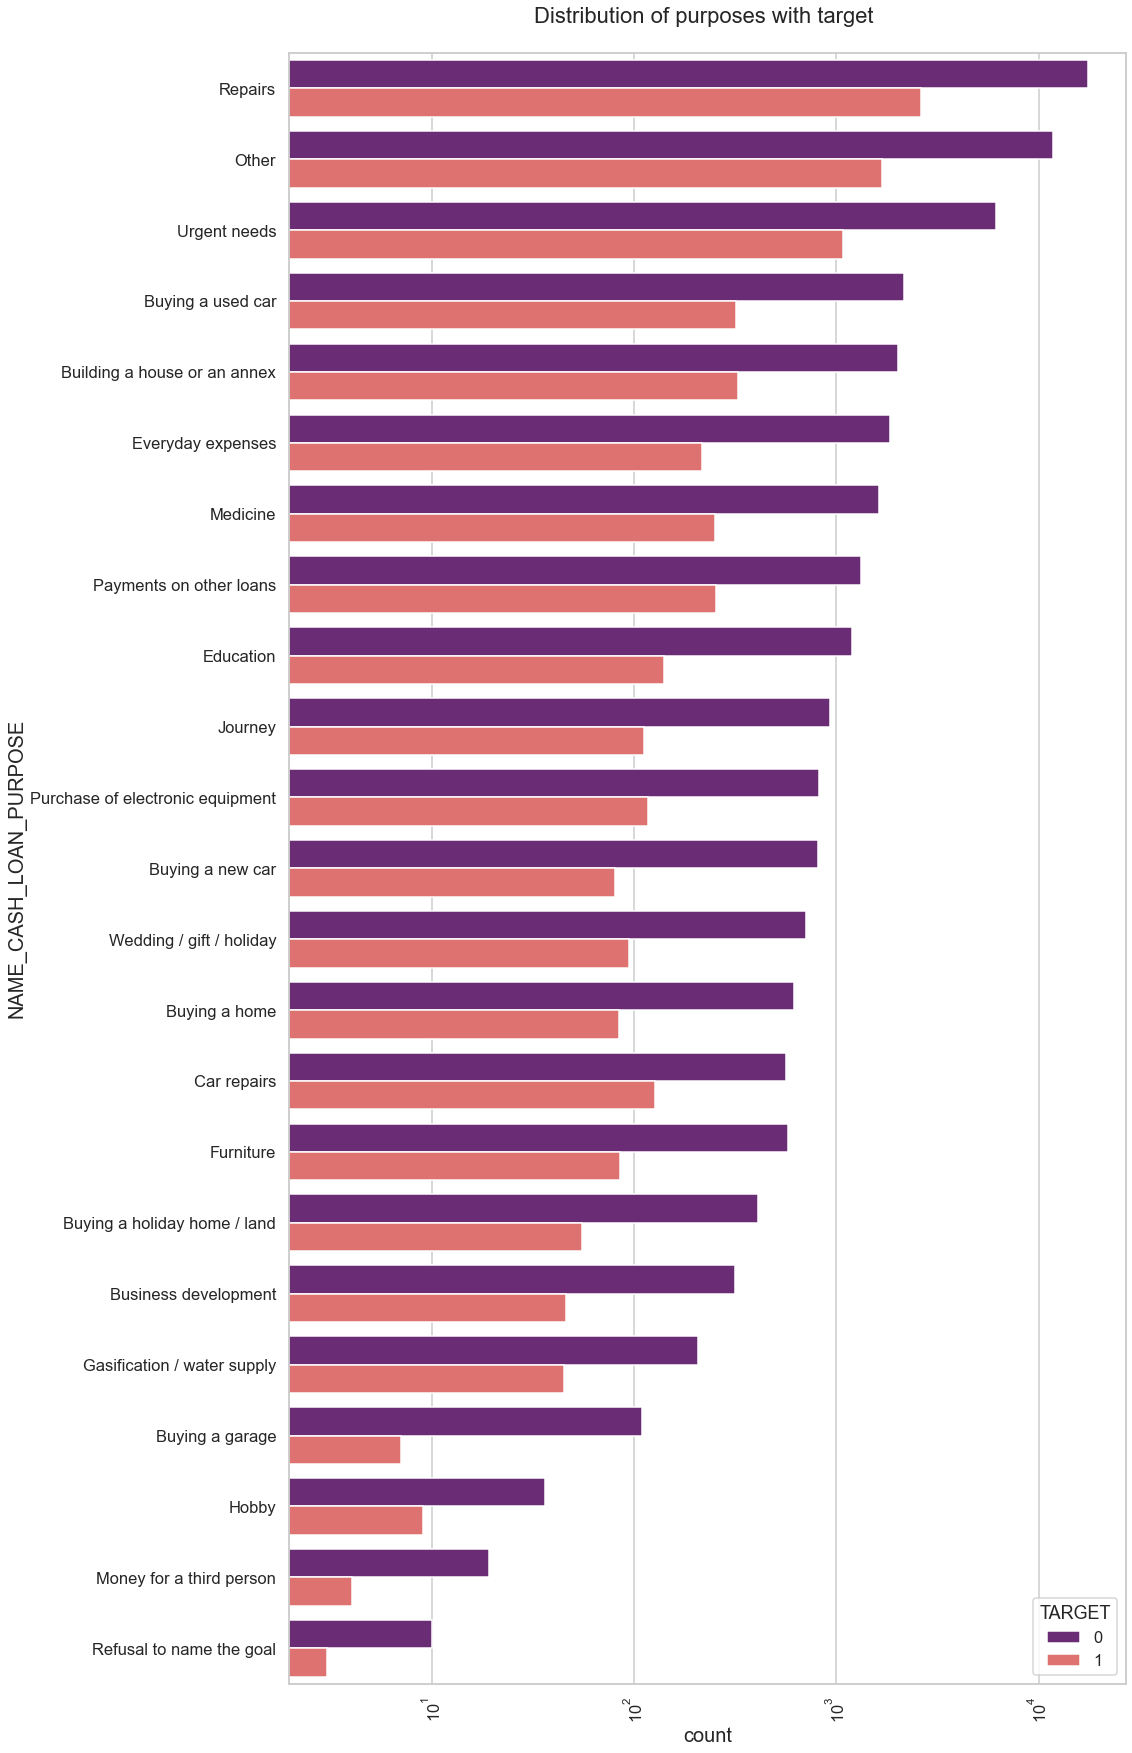

In [103]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

#### From above we can analyse that
1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

### Performing bivariate analysis

In [104]:
# Box plotting for Credit amount in logarithmic scale

new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TARGET                       59413 non-null  int64   
 1   NAME_CONTRACT_TYPE           59413 non-null  object  
 2   CODE_GENDER                  59413 non-null  object  
 3   FLAG_OWN_REALTY              59413 non-null  object  
 4   CNT_CHILDREN                 59413 non-null  int64   
 5   AMT_INCOME_TOTAL             59413 non-null  float64 
 6   AMT_CREDIT                   59413 non-null  float64 
 7   AMT_ANNUITY                  59413 non-null  float64 
 8   AMT_GOODS_PRICE              59413 non-null  float64 
 9   NAME_INCOME_TYPE             59413 non-null  object  
 10  NAME_EDUCATION_TYPE          59413 non-null  object  
 11  NAME_FAMILY_STATUS           59413 non-null  object  
 12  NAME_HOUSING_TYPE            59413 non-null  object  
 13  R

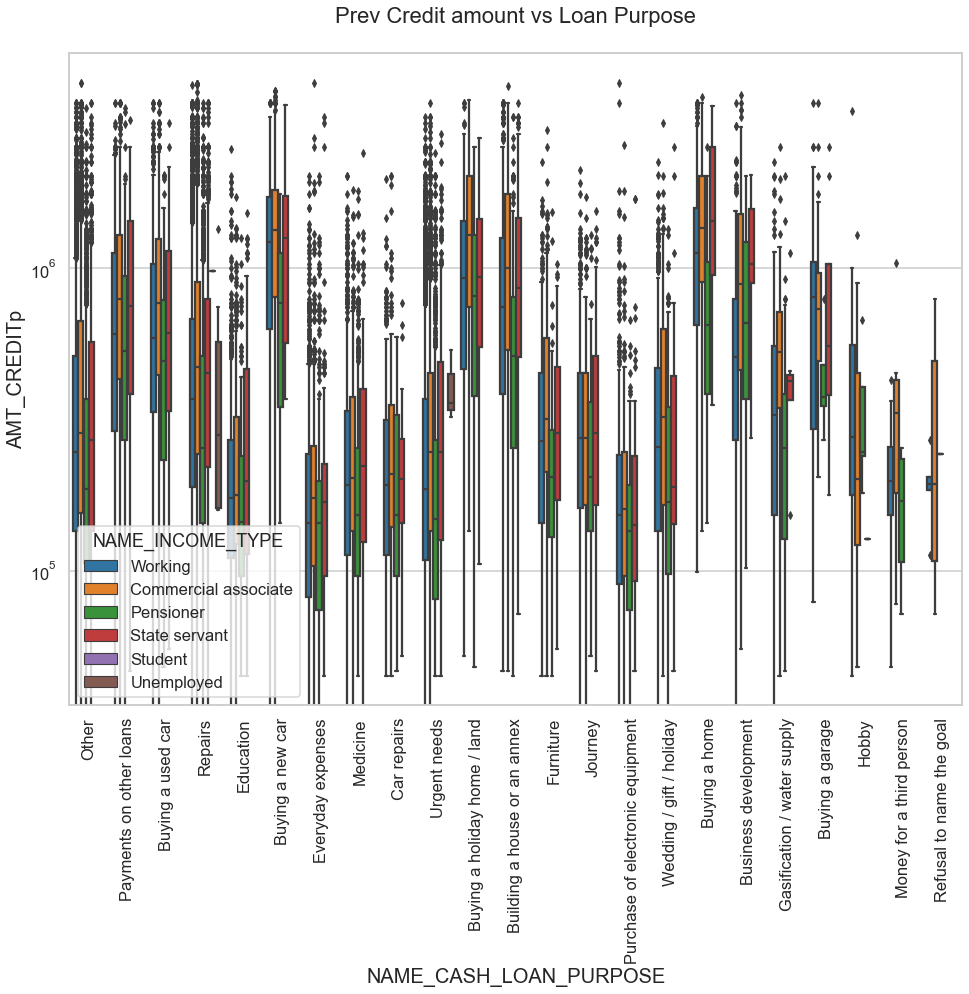

In [105]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITp',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### From above we can see that
1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

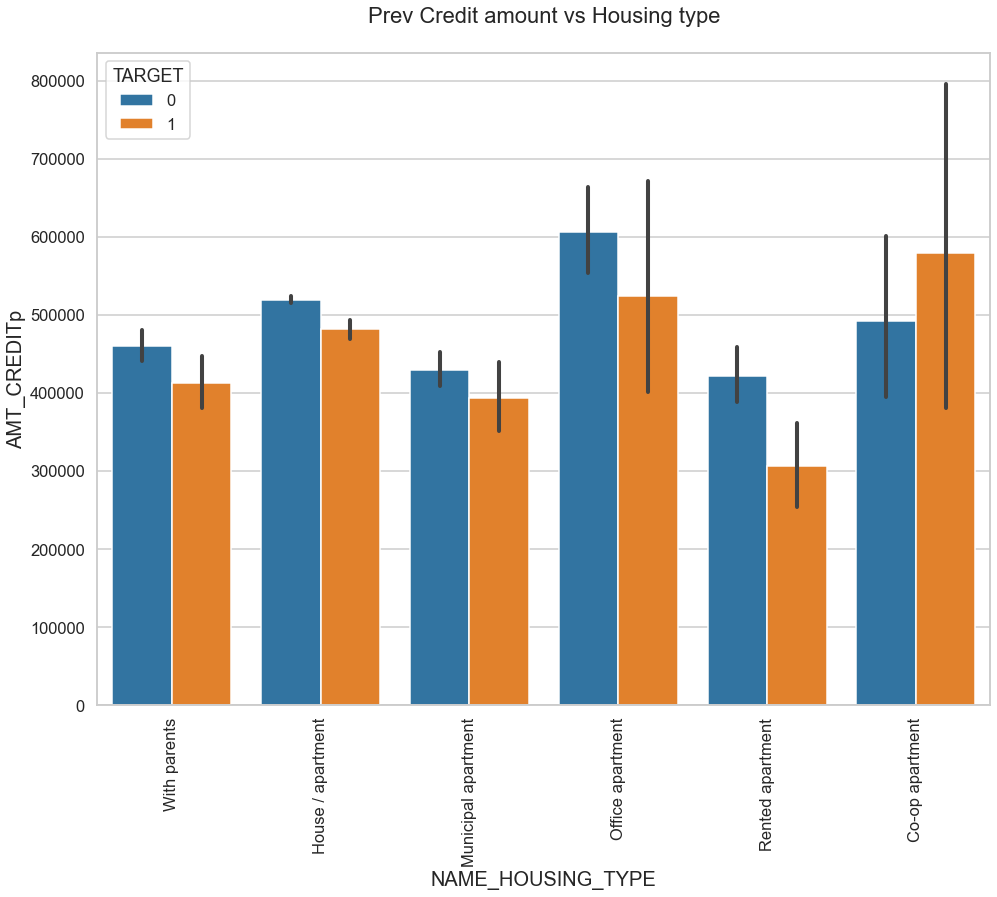

In [106]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDITp',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

# CONCLUSION
### 1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

### 2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

### 3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

### 4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.